# Iris Analysis

<span>Below I take a look at the iris dataset. Many Data Science programs online and within classrooms use this dataset for clustering and classification promblems. Below I plot the data out using a variety of plots to get a better understanding of the dataset every is so keen to teaching about, and summarize why this dataset has been so popular</span>

### Import Preliminaries

In [143]:
# Call magic commands
%matplotlib inline
%pylab inline
 
# Import Python modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import scipy
import seaborn as sns
import sklearn
import warnings

# Set pandas dataframe options
pd.set_option('max_columns',1000)
pd.set_option('max_rows',30)
 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.set_option('display.float_format', '{:.2g}'.format)
pylab.rcParams['figure.figsize'] = (5.0, 5.0)
warnings.filterwarnings('ignore');

Populating the interactive namespace from numpy and matplotlib


### Import Data

In [218]:
# Import data from sklearn
from sklearn.datasets import load_iris
iris = load_iris()
features, target = iris.data, iris.target

# Create a Pandas dataframe of the data
df = pd.concat([pd.DataFrame(features), pd.Series(target)], axis=1)
df.columns = iris['feature_names'] + ['target']
df.head(n=5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.100,3.500,1.400,0.200,0
1,4.900,3.000,1.400,0.200,0
2,4.700,3.200,1.300,0.200,0
3,4.600,3.100,1.500,0.200,0
4,5.000,3.600,1.400,0.200,0


In [145]:
# Number of data entries, feature datatype within the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


### Classes

The classes within this dataset a really balanced, with the entire data set containing 150 entries with a sample of 50 entries from each of the 3 classes as seen in the plot below

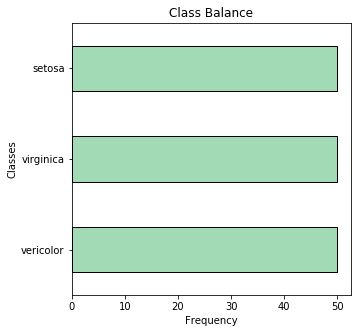

In [257]:
# Map class names to Series and plot the results
target_names = df.target.map({0:'setosa',1:'vericolor',2:'virginica'})
target_names .value_counts().plot.barh(color='#a1dab4', 
                                   edgecolor='black')
plt.title('Class Balance')
plt.xlabel('Frequency')
plt.ylabel('Classes');

Next, let's look at the summary statistics for the 4 continuous feature that are included within this dataset. As I drop the target columns we will be able to view the mean, standard deviation, quartiles, max, and min for each feature.

In [267]:
# View the summary statistics table of the features.
fdf = df.drop('target',axis=1)
fdf.describe().drop('count',axis=0)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
mean,5.8,3.1,3.8,1.2
std,0.83,0.43,1.8,0.76
min,4.3,2,1,0.1
25%,5.1,2.8,1.6,0.3
50%,5.8,3,4.3,1.3
75%,6.4,3.3,5.1,1.8
max,7.9,4.4,6.9,2.5


The feature all us the same scale, the number is reported back in centimeters. The means (average) of each features' distribution seem to be similar close to each other with sepal width and petal length having means that come within 1 cm of each other. With petal length have greater variance within its distribution as seen in its standard deviation. 

Sepal Length and petal width seem to have a wide range between their min and max values, hinting at a possible wider distribution. Let's plot our the distributions of the feature just to makes sure.

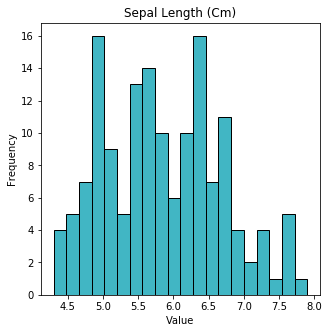

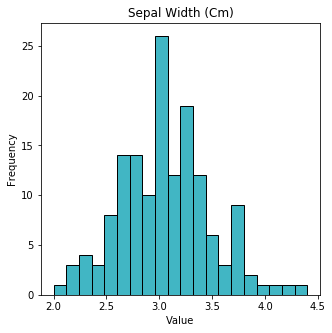

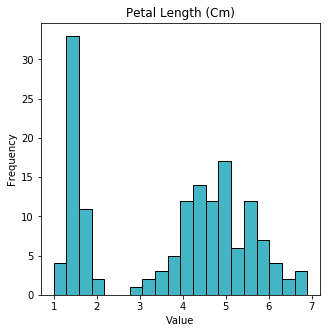

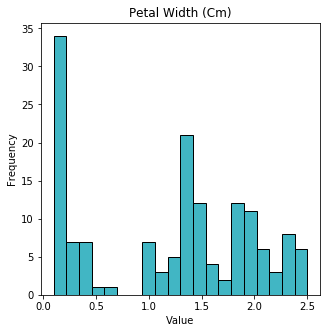

In [261]:
# Plot a histogram for each feature
for col in df.drop('target',axis=1):
    plt.figure()
    df[col].hist(color='#41b6c4', bins=20, edgecolor='black',
                 grid=False)
    plt.title(str.title(col))
    plt.ylabel('Frequency')
    plt.xlabel('Value')

Sepal Width and Sepal Length seem to have a similar Gaussian distribution, again on different scales. Petal Length and Petal Width also seem to reasonable each other. Let's see if these distributions look when segments by their targets Setosa (0), Versicolor (1), and Virginica (2).

### Dimensionality

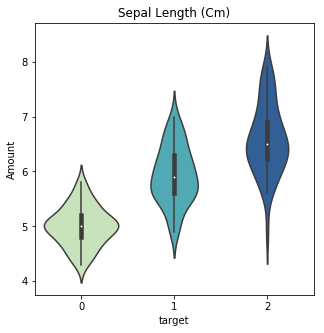

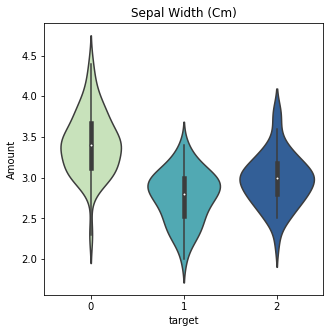

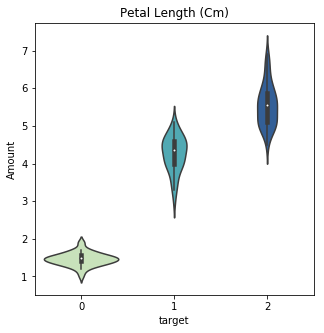

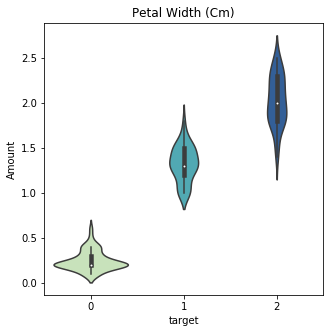

In [268]:
# Violin plot of each feature distributino segment by target class
for col in fdf:
    plt.figure()
    sns.violinplot(y=col,x='target',data=df, palette='YlGnBu')
    plt.title(str.title(col))
    plt.ylabel('Amount')

After segment each feature by its target class we start to see some differentiation in the Petal Width and Petal Length classes. Yet for Versicolor (1) and Virginica (2) within the Sepal Width and Sepal Length features the distribution remain very similar within each class.



### Correlations

We are going to show our correlation matrix slipt from our p-value matrix as we assess the correlation between features and their statistical significance. First, let's take a look at our p-value matrix.

In [293]:
# Data Frame Styling
def signific_p(val):
    if val > 0.05:
      color = 'red' 
    else:
      color = 'black'
    return 'color: %s' % color

# Create a datfarme to store p-values
fnum = df.shape[1]-1
pvalues = np.zeros((fnum, fnum))
pvalues = pd.DataFrame(pvalues)

# Calculating all the pvalues for our corrlation
for i, col1 in zip(range(fnum),fdf):
    for j, col2 in zip(range(fnum),fdf):
        pvalues.iloc[i,j] = scipy.stats.pearsonr(df[col1],df[col2])[1]

# Display results in scientific notation
pd.set_option('display.float_format', '{:.2g}'.format)

pvalues.columns, pvalues.index = iris['feature_names'], iris['feature_names']
pvalues.style.applymap(signific_p)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0,0.182765,1.03845e-47,2.31485e-37
sepal width (cm),0.182765,0,8.42937e-08,7.52389e-06
petal length (cm),1.03845e-47,8.42937e-08,0,5.77666e-86
petal width (cm),2.31485e-37,7.52389e-06,5.77666e-86,0


The majority of the p-values for our correlation matrix have found to be significant except the for the correlation between Sepal width and Sepal Lenth. As we can see in the correlation matrix below Sepal Width and Sepal don't have a strong R-squared value with each other. We'll make a note of this factor moving forward and reject the null hypothesis for this correlation.

In [294]:
fdf.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1,-0.11,0.87,0.82
sepal width (cm),-0.11,1,-0.42,-0.36
petal length (cm),0.87,-0.42,1,0.96
petal width (cm),0.82,-0.36,0.96,1


You can find the correlation matrix for our features above, again we cannot as we learned from the p-value matrix above the correlation between Sepal Width and Petal Length is not statistically significant. Given this information, we can also see that the correlation between Sepal Length and Petal Length, Petal Width and Petal Length, Sepal Length and Petal Width is rather high. To make the correlation matrix more visually appealing, I have created a heat map of the dataframe found below. 

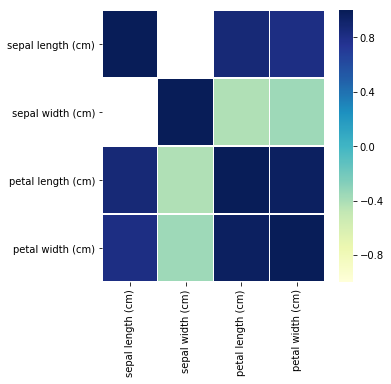

In [271]:
sns.heatmap(fdf.corr(),linewidths=.5,
           vmin=-1, vmax=1, mask=pvalues>0.05, cmap='YlGnBu');

### Correlation by Dimension

Finally lets plot out each of combination of our three highly correlated feature, to give us a clearer understanding of the where the individual sample points line and up. Keep in mind when we build a predictive machine learning model on this data. The model will have some difficult parsing the predictive power of these features if the independent feature across classes are this closely related.

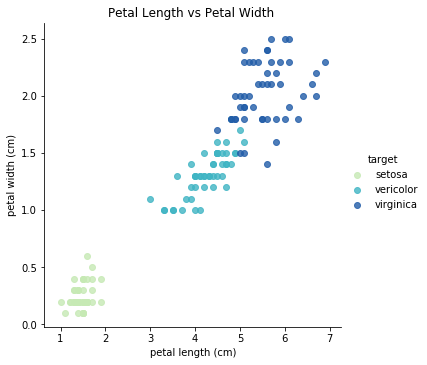

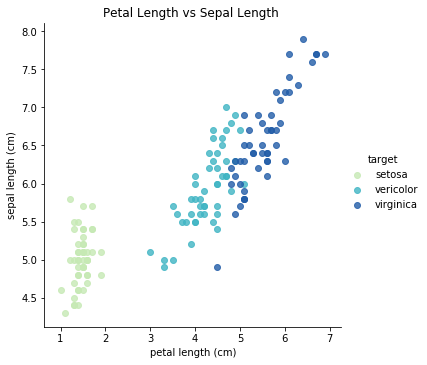

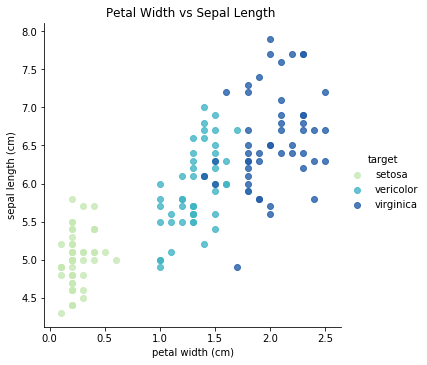

In [292]:
# Mapping Target Classes on Target Encodings
cdf = df.copy()
cdf.target = df.target.map({0:'setosa',1:'vericolor',2:'virginica'})

# Scatter Plot One
sns.lmplot(x='petal length (cm)',y='petal width (cm)', data=cdf,
           hue='target',fit_reg=False, palette='YlGnBu');
ax = plt.gca()
ax.set_title("Petal Length vs Petal Width ")

# Scatter Plot 2
sns.lmplot(x='petal length (cm)',y='sepal length (cm)', data=cdf,
           hue='target',palette='YlGnBu', fit_reg=False);
ax = plt.gca()
ax.set_title("Petal Length vs Sepal Length ")

# Scatter Plot 3
sns.lmplot(x='petal width (cm)',y='sepal length (cm)', data=cdf,
           hue='target',palette='YlGnBu', fit_reg=False);
ax = plt.gca() 
ax.set_title("Petal Width vs Sepal Length ");

Looking at this scatter plots above we can see that observations of the Vericolor and Virginica classes start to are distributions similar, with the observations from the high end of the Vericolor distribution begin to blend with the lower tail of the Virginica distribution. Again since the scale of these features is the same (centimeter),  any machine learning model will have some difficulting interpreting these independent variables when predicting classes.

In my notebook linked below, named "Classification Models", I will begin using a few machine learning models on this dataset and tune there performance. I want to know which model can provide the best performance on this dataset give its small size, and which model has the best predictive power given its computation cost.

Author: Kavi Sekhon

##### More Notebooks

- [Classifiation Models](http://kavisekhon.com/Classification%20Models.html)


##### Further Readings
- [Wikipedia Articale on the Iris Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)<br> 
- [Sklearn Documentation on the Iris Dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)<br> 